## Task to be Performed:

- Scrape the job listings from "Indeed.com" for the keyword "Python developer".
- Store the scraped data in an Excel sheet.
- Use NumPy to calculate the average salary for Python developers across cities and display that in a bar graph.
- Put the python code on google colab and share the link

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import re
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
website= 'https://in.indeed.com/jobs?q=python+developer&start='

In [3]:
driver = webdriver.Edge()
driver.get(website)

In [4]:
# Finding the job listings on the page
scrap_data = driver.find_elements(By.CLASS_NAME, 'resultContent')

In [5]:
scrap_data

[<selenium.webdriver.remote.webelement.WebElement (session="92b677222e2ad807f69405c5a41ea695", element="47DEFA6DE15C6595B590E90ABC981F5E_element_41")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92b677222e2ad807f69405c5a41ea695", element="47DEFA6DE15C6595B590E90ABC981F5E_element_42")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92b677222e2ad807f69405c5a41ea695", element="47DEFA6DE15C6595B590E90ABC981F5E_element_43")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92b677222e2ad807f69405c5a41ea695", element="47DEFA6DE15C6595B590E90ABC981F5E_element_44")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92b677222e2ad807f69405c5a41ea695", element="47DEFA6DE15C6595B590E90ABC981F5E_element_45")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92b677222e2ad807f69405c5a41ea695", element="47DEFA6DE15C6595B590E90ABC981F5E_element_46")>,
 <selenium.webdriver.remote.webelement.WebElement (session="92b677222e2ad807f69405c5a41e

In [6]:
total_jobs_text = driver.find_element(By.CLASS_NAME, 'jobsearch-JobCountAndSortPane-jobCount').text

total_jobs_match = re.search(r'[\d,]+', total_jobs_text)

if total_jobs_match:
    total_jobs = int(total_jobs_match.group().replace(',', ''))
else:
    total_jobs = 0

if total_jobs > 0:
    max_iter_pages = math.ceil(total_jobs / 15)
else:
    max_iter_pages = 0

print(total_jobs_text)
print('Max Iterable Pages for this search:', max_iter_pages)

9,796 jobs
Max Iterable Pages for this search: 654


In [7]:
driver.quit()

In [8]:
website= 'https://in.indeed.com/jobs?q=python+developer&start='
driver = webdriver.Edge()
scrap_data= driver.find_elements(By.CLASS_NAME, 'resultContent')

# Creating lists to store job titles, company names, locations, salaries, job types, and description links
job_titles = []
company_names = []
locations = []
salaries = []
job_types = []
description_links = []

for page in range(0, 700, 10):
    driver.get(base_url + str(page))
    time.sleep(5)

    scrap_data = driver.find_elements(By.CLASS_NAME, 'resultContent')

    
    for card in scrap_data:
        try:
            job_title = card.find_element(By.CLASS_NAME, 'jobTitle').text
            job_titles.append(job_title)

            company_name = card.find_element(By.CSS_SELECTOR, 'span[data-testid="company-name"]').text
            company_names.append(company_name)

            try:
                location_element = card.find_element(By.CSS_SELECTOR, 'div.css-ozny1x.eu4oa1w0')
                location = location_element.text
            except NoSuchElementException:
                try:
                    location_element = card.find_element(By.CSS_SELECTOR, 'div[data-testid="text-location"]')
                    location = location_element.text
                except NoSuchElementException:
                    location = "N/A"
            locations.append(location)

            
            metadata_elements = card.find_elements(By.CSS_SELECTOR, 'div.metadata div.css-1ihavw2')
            job_type = "N/A"
            
            for metadata_element in metadata_elements:
                text = metadata_element.text
                if "Full-time" in text or "Part-time" in text:
                    job_type = text
                else:
                    pass
            job_types.append(job_type)

            
            try:
                
                salary_element = card.find_element(By.CSS_SELECTOR, 'div.metadata.salary-snippet-container div.css-1ihavw2')
                salary = salary_element.text
                salaries.append(salary)
            except NoSuchElementException:
                
                salaries.append("N/A")

            
            description_link = card.find_element(By.CLASS_NAME, 'jcs-JobTitle').get_attribute('href')
            description_links.append(description_link)

        except NoSuchElementException:
            
            job_titles.append("N/A")
            company_names.append("N/A")
            locations.append("N/A")
            job_types.append("N/A")
            salaries.append("N/A")
            description_links.append("N/A")


job_data = pd.DataFrame({
    'Job Title': job_titles,
    'Company Name': company_names,
    'Location': locations,
    'Salary': salaries,
    'Job Type': job_types,
    'Description Link': description_links  # Add the new column
})


job_data

,Job Title,Company Name,Location,Salary,Job Type,Description Link
0,Data Engineer -Specialist / Sr. Specialist,Colgate-Palmolive,"Mumbai, Maharashtra",N/A,N/A,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,"Sr. Python Developer (Python, QT, Image Proces...",MPAGS E-Systems & Innovative Solutions Pvt . Ltd.,"Pune, Maharashtra","₹2,50,000 - ₹6,00,000 a year",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,Senior Development Operations Engineer,Clarivate,"Bengaluru, Karnataka",N/A,Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,Python/Django Developer,Intelligent Outsourcing,"Mohali, Punjab","₹30,000 - ₹1,50,000 a month",Full-time\n+1,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,Principal Data Engineering - Databricks,HP,"Gurgaon, Haryana",N/A,Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
...,...,...,...,...,...,...
1041,Python Django & JavaScript Developer,Augusta Infotech,"Gurgaon, Haryana",N/A,N/A,https://in.indeed.com/rc/clk?jk=f45dc2785ff78a...
1042,"Software Engineering Manager II, Geo",Google,"Bengaluru, Karnataka",N/A,Full-time,https://in.indeed.com/rc/clk?jk=65bb6745436bc8...
1043,Web developer (Back-End Developers),NEET ADVISOR PVT. LTD.,"New Delhi, Delhi","₹15,000 - ₹30,000 a month",Full-time\n+1,https://in.indeed.com/company/NEET-ADVISOR-PVT...
1044,"Opening for SQL Lead Developer | Coimbatore, B...",Aezion In,"Bengaluru, Karnataka","Up to ₹20,00,000 a year",Full-time\n+1,https://in.indeed.com/company/Aezion-In/jobs/S...


In [9]:
driver.quit()

In [10]:
raw_job_data.to_excel('indeed_raw_job_data.xlsx', index=False)

In [14]:
df = pd.read_excel('indeed_raw_job_data.xlsx')

In [15]:
df.head(20)

,Job Title,Company Name,Location,Salary,Job Type,Description Link
0,Data Engineer -Specialist / Sr. Specialist,Colgate-Palmolive,"Mumbai, Maharashtra",NaN,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
1,"Sr. Python Developer (Python, QT, Image Proces...",MPAGS E-Systems & Innovative Solutions Pvt . Ltd.,"Pune, Maharashtra","₹2,50,000 - ₹6,00,000 a year",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
2,Senior Development Operations Engineer,Clarivate,"Bengaluru, Karnataka",NaN,Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
3,Python/Django Developer,Intelligent Outsourcing,"Mohali, Punjab","₹30,000 - ₹1,50,000 a month",Full-time\n+1,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
4,Principal Data Engineering - Databricks,HP,"Gurgaon, Haryana",NaN,Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
5,SAP ABAP - Sr. Technology Associate / Specialist,Colgate-Palmolive,"Mumbai, Maharashtra",NaN,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
6,Associate Java and DevOps Developer,BOEING,"Bengaluru, Karnataka",NaN,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...
7,Python Developer,BigShyft,"Bengaluru, Karnataka","₹7,00,000 - ₹15,00,000 a year",NaN,https://in.indeed.com/rc/clk?jk=0394ace2c560bb...
8,Intern,Mercedes-Benz Research and Development India...,"Bengaluru, Karnataka",NaN,NaN,https://in.indeed.com/rc/clk?jk=9faac55ba53164...
9,Python Developer (MEAS),Mercedes-Benz Research and Development India...,"Bengaluru, Karnataka",NaN,NaN,https://in.indeed.com/rc/clk?jk=826163a3d1a73b...


### Data Cleaning

In [16]:
# Removing rows whree there is no value in 'Job Title'
print(f"Shape of dataframe before removing NaN rows: {df.shape}")
df = df.dropna(subset=['Job Title'])
print(f"Shape of dataframe after removing NaN rows: {df.shape}")

Shape of dataframe before removing NaN rows: (1046, 6)
Shape of dataframe after removing NaN rows: (1032, 6)


In [17]:
# Checking duplicate rows into the dataset
print(f"Total duplicate rows: {df.duplicated().sum()}")

Total duplicate rows: 216


In [18]:
# Removing duplicate rows from the dataset
print(f"Shape of dataframe before removing duplicates: {df.shape}")
df = df.drop_duplicates(keep='first')
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Shape of dataframe before removing duplicates: (1032, 6)
Shape of dataframe after removing duplicates: (816, 6)


In [19]:
# Checking the occurrences of each location
df['Location'].value_counts()

Location
Bengaluru, Karnataka                    156
Remote in Bengaluru, Karnataka           78
Pune, Maharashtra                        75
Hyderabad, Telangana                     43
Remote                                   34
                                       ... 
Remote in Noida, Uttar Pradesh            1
Bhayandar, Mumbai, Maharashtra            1
Kothrud, Pune, Maharashtra                1
Hybrid remote in Chennai, Tamil Nadu      1
Remote in Haryana                         1
Name: count, Length: 101, dtype: int64

In [20]:
# Checking unique values in 'Job Type' column
df['Job Type'].unique()

array([nan, 'Full-time', 'Full-time\n+1', 'Full-time\n+2',
       'Full-time\n+3', 'Part-time\n+2', 'Full-time\n+4', 'Part-time\n+1'],
      dtype=object)

In [21]:
# Converting values in the 'Job Type' column
df['Job Type'] = df['Job Type'].str.replace('Full-time\n+1', 'Full-time')
df['Job Type'] = df['Job Type'].str.replace('Full-time\n+2', 'Full-time')
df['Job Type'] = df['Job Type'].str.replace('Full-time\n+3', 'Full-time')
df['Job Type'] = df['Job Type'].str.replace('Full-time\n+4', 'Full-time')
df['Job Type'] = df['Job Type'].str.replace('Part-time\n+1', 'Part-time')
df['Job Type'] = df['Job Type'].str.replace('Part-time\n+2', 'Part-time')
df['Job Type'] = df['Job Type'].str.replace('Part-time\n+3', 'Part-time')
df['Job Type'] = df['Job Type'].str.replace('Part-time\n+4', 'Part-time')

In [22]:
# Again checking unique values in 'Job Type' column
df['Job Type'].unique()

array([nan, 'Full-time', 'Part-time'], dtype=object)

In [23]:
# Checking unique values in 'Location' column
df['Location'].unique()

array(['Mumbai, Maharashtra', 'Pune, Maharashtra', 'Bengaluru, Karnataka',
       'Mohali, Punjab', 'Gurgaon, Haryana',
       'Visakhapatnam, Andhra Pradesh', 'Remote in Bengaluru, Karnataka',
       'Hyderabad, Telangana', 'India', 'Chennai, Tamil Nadu',
       'Indore, Madhya Pradesh', 'Guindy, Chennai, Tamil Nadu',
       'Raipur, Chhattisgarh', 'Ernakulam, Kerala',
       'Thiruvananthapuram, Kerala', 'Kottayam, Kerala',
       'Hybrid remote in Bengaluru, Karnataka', 'Remote',
       'Remote in Remote', 'Delhi, Delhi', 'Udaipur, Rajasthan',
       'New Delhi, Delhi', 'Alkapuri, Vadodara, Gujarat',
       'Surat, Gujarat', 'Bhopal, Madhya Pradesh', 'Gandhinagar, Gujarat',
       'Coimbatore, Tamil Nadu', 'Jaipur, Rajasthan',
       'Varanasi, Uttar Pradesh', 'Kochi, Kerala',
       'Hybrid remote in Delhi, Delhi', 'Goa', 'Calicut, Kerala',
       'Kerala', 'Remote in Kharadi, Pune, Maharashtra',
       'Malappuram, Kerala', 'Navrangpura, Ahmedabad, Gujarat',
       'Remote in Indi

In [24]:
# Removing "Remote in" from the values in the 'Location' column
df['Location'] = df['Location'].str.replace('Remote in ', '')
df['Location'] = df['Location'].str.replace('Hybrid remote in ', '')

In [25]:
# Again checking unique values in 'Location' column
df['Location'].unique()

array(['Mumbai, Maharashtra', 'Pune, Maharashtra', 'Bengaluru, Karnataka',
       'Mohali, Punjab', 'Gurgaon, Haryana',
       'Visakhapatnam, Andhra Pradesh', 'Hyderabad, Telangana', 'India',
       'Chennai, Tamil Nadu', 'Indore, Madhya Pradesh',
       'Guindy, Chennai, Tamil Nadu', 'Raipur, Chhattisgarh',
       'Ernakulam, Kerala', 'Thiruvananthapuram, Kerala',
       'Kottayam, Kerala', 'Remote', 'Delhi, Delhi', 'Udaipur, Rajasthan',
       'New Delhi, Delhi', 'Alkapuri, Vadodara, Gujarat',
       'Surat, Gujarat', 'Bhopal, Madhya Pradesh', 'Gandhinagar, Gujarat',
       'Coimbatore, Tamil Nadu', 'Jaipur, Rajasthan',
       'Varanasi, Uttar Pradesh', 'Kochi, Kerala', 'Goa',
       'Calicut, Kerala', 'Kerala', 'Kharadi, Pune, Maharashtra',
       'Malappuram, Kerala', 'Navrangpura, Ahmedabad, Gujarat',
       'Madurai, Tamil Nadu', 'Guwahati, Assam', 'Ahmedabad, Gujarat',
       'Andhra Pradesh', 'Nagpur, Maharashtra', 'Noida, Uttar Pradesh',
       'Jabalpur, Madhya Pradesh', 'Ko

In [26]:
# Calculating the total number of rows where the 'Location' column having value 'Remote'
remote_count = len(df[df['Location'] == 'Remote'])
print("Total rows with 'Remote' in the 'Location' column:", remote_count)

Total rows with 'Remote' in the 'Location' column: 54


In [27]:
# Removing the rows where the 'Location' column has the value 'Remote'
print(f"Shape of dataframe before removing rows: {df.shape}")
df = df[df['Location'] != 'Remote']
print(f"Shape of dataframe after removing rows: {df.shape}")

Shape of dataframe before removing rows: (816, 6)
Shape of dataframe after removing rows: (762, 6)


In [28]:
# Defining a custom function to standardize location names
def standardize_location(location):
    if pd.notna(location):
        if 'Alkapuri, Vadodara, Gujarat' in location:
            return 'Vadodara, Gujarat'
        elif'Nagar, Ranchi, Jharkhand' in location:
            return 'Ranchi, Jharkhand'
        elif 'Greater Noida, Uttar Pradesh' in location:
            return 'Noida, Uttar Pradesh'
        elif 'Vaishali Nagar, Jaipur, Rajasthan' in location:
            return 'Jaipur, Rajasthan'
        elif 'Panaji, Goa' in location or 'Verna, Goa' in location:
            return 'Goa'
        elif 'Panaji, Goa' in location or 'Verna, Goa' in location:
            return 'Goa'
        elif 'Madhapur, Hyderabad, Telangana' in location or 'Malkajgiri, Hyderabad, Telangana' in location:
            return 'Hyderabad, Telangana'
        elif 'New Delhi, Delhi' in location or 'Delhi' in location or 'Delhi, Delhi' in location or 'Saket, Delhi, Delhi' in location:
            return 'New Delhi'
        elif 'Indiranagar, Bengaluru, Karnataka' in location or 'HSR Layout, Bengaluru, Karnataka' in location or 'Hebbal, Bengaluru, Karnataka' in location:
            return 'Bengaluru, Karnataka'
        elif 'Lalbazar, Kolkata, West Bengal' in location or 'Ballygunge, Kolkata, West Bengal' in location or 'Calcutta Riverside, Kolkata, West Bengal' in location:
            return 'Kolkata, West Bengal'
        elif 'Guindy, Chennai, Tamil Nadu' in location or 'T Nagar, Chennai, Tamil Nadu' in location or 'Chetput, Chennai, Tamil Nadu' in location or 'Tambaram West, Chennai, Tamil Nadu' in location or 'Adambakkam, Chennai, Tamil Nadu' in location:
            return 'Chennai, Tamil Nadu'
        elif 'Navrangpura, Ahmedabad, Gujarat' in location or 'Bopal, Ahmedabad, Gujarat' in location or 'Bodakdev, Ahmedabad, Gujarat' in location or 'Gota, Ahmedabad, Gujarat' in location:
            return 'Ahmedabad, Gujarat'
        elif 'Navi Mumbai, Maharashtra' in location or 'Andheri West, Mumbai, Maharashtra' in location or 'Mumbai Central, Mumbai, Maharashtra' in location or 'Malad, Mumbai, Maharashtra' in location or 'Bhayandar, Mumbai, Maharashtra' in location:
            return 'Mumbai, Maharashtra'
        elif 'Kharadi, Pune, Maharashtra' in location or 'Kothrud, Pune, Maharashtra' in location or 'Narhe, Pune, Maharashtra' in location or 'Chinchwad, Pune, Maharashtra' in location or 'Baner, Pune, Maharashtra' in location or 'Yerawada, Pune, Maharashtra' in location:
            return 'Pune, Maharashtra'
        
    return location

# Creating a new column with the standardized location names
df['Location'] = df['Location'].apply(lambda x: standardize_location(x))

In [29]:
# Again checking unique values in 'Location' column
df['Location'].unique()

array(['Mumbai, Maharashtra', 'Pune, Maharashtra', 'Bengaluru, Karnataka',
       'Mohali, Punjab', 'Gurgaon, Haryana',
       'Visakhapatnam, Andhra Pradesh', 'Hyderabad, Telangana', 'India',
       'Chennai, Tamil Nadu', 'Indore, Madhya Pradesh',
       'Raipur, Chhattisgarh', 'Ernakulam, Kerala',
       'Thiruvananthapuram, Kerala', 'Kottayam, Kerala', 'New Delhi',
       'Udaipur, Rajasthan', 'Vadodara, Gujarat', 'Surat, Gujarat',
       'Bhopal, Madhya Pradesh', 'Gandhinagar, Gujarat',
       'Coimbatore, Tamil Nadu', 'Jaipur, Rajasthan',
       'Varanasi, Uttar Pradesh', 'Kochi, Kerala', 'Goa',
       'Calicut, Kerala', 'Kerala', 'Malappuram, Kerala',
       'Ahmedabad, Gujarat', 'Madurai, Tamil Nadu', 'Guwahati, Assam',
       'Andhra Pradesh', 'Nagpur, Maharashtra', 'Noida, Uttar Pradesh',
       'Jabalpur, Madhya Pradesh', 'Kolkata, West Bengal',
       'Panchkula, Haryana', 'Rajkot, Gujarat', 'Erode, Tamil Nadu',
       'Tamil Nadu', 'Lucknow, Uttar Pradesh', 'Chandigarh, Cha

In [30]:
# Checking unique values in 'Salary' column
df['Salary'].unique()

array([nan, '₹2,50,000 - ₹6,00,000 a year', '₹30,000 - ₹1,50,000 a month',
       '₹7,00,000 - ₹15,00,000 a year', '₹60,000 a month',
       '₹7,00,000 - ₹10,00,000 a year', 'From ₹45,000 a month',
       '₹15,000 - ₹35,000 a month', '₹4,00,000 - ₹5,00,000 a year',
       '₹12,000 a month', '₹3,00,000 - ₹15,00,000 a year',
       '₹3,00,000 - ₹6,00,000 a year', '₹3,60,000 - ₹4,00,000 a year',
       'From ₹12,000 a month', '₹21,000 - ₹32,000 a month',
       '₹20,000 - ₹47,442 a month', '₹12,803 - ₹16,625 a month',
       '₹9,000 - ₹13,000 a month', '₹700 - ₹900 an hour',
       'Up to ₹18,00,000 a year', '₹15,000 - ₹40,000 a month',
       '₹3,00,000 - ₹5,00,000 a year', '₹15,00,000 - ₹25,00,000 a year',
       '₹25,000 - ₹90,000 a month', '₹20,000 - ₹50,000 a month',
       '₹8,000 - ₹12,000 a month', '₹35,000 - ₹60,000 a month',
       '₹6,404 - ₹10,712 a month', 'From ₹15,000 a month',
       '₹35,000 - ₹80,214 a month', 'Up to ₹8,00,000 a year',
       '₹30,000 - ₹50,000 a month',

In [31]:
# Counting the number of rows with value 'hour' in the 'Salary' column
hourly_salary_count = df[df['Salary'].str.contains('hour', case=False, na=False)].shape[0]
print(f"Total number of rows with 'hour' in the 'Salary' column is : {hourly_salary_count}")

Total number of rows with 'hour' in the 'Salary' column is : 2


In [32]:
# Removing rows with 'hour' in the 'Salary' column
print(f"Shape of Dataframe before removing the rows : {df.shape}")
df = df[~df['Salary'].str.contains('hour', case=False, na=False)]
print(f"Shape of Dataframe after removing the rows : {df.shape}")

Shape of Dataframe before removing the rows : (762, 6)
Shape of Dataframe after removing the rows : (760, 6)


In [33]:
# Defining a function to process salary values
def process_salary(salary):
    if pd.notna(salary):
        # Extract numbers and currency symbols from the salary string
        matches = re.findall(r'[\d,]+|\D', salary)
        
        # Remove any non-numeric characters (like commas) and convert to integers
        numeric_values = [int(match.replace(',', '')) for match in matches if match.replace(',', '').isdigit()]
        
        # Calculating the average for salary ranges
        if len(numeric_values) > 1:
            average_salary = sum(numeric_values) / len(numeric_values)
        else:
            average_salary = numeric_values[0]
        
        # Process salary based on time period (month or year)
        if 'month' in salary:
            return round(average_salary, 0)
        elif 'year' in salary:
            return round(average_salary / 12, 0)
        else:
            return round(average_salary, 0)

# Apply the custom function into the 'Salary' column
df['Processed Salary'] = df['Salary'].apply(process_salary)

In [34]:
# Checking head of the dataframe
df.head(10)

,Job Title,Company Name,Location,Salary,Job Type,Description Link,Processed Salary
0,Data Engineer -Specialist / Sr. Specialist,Colgate-Palmolive,"Mumbai, Maharashtra",NaN,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN
1,"Sr. Python Developer (Python, QT, Image Proces...",MPAGS E-Systems & Innovative Solutions Pvt . Ltd.,"Pune, Maharashtra","₹2,50,000 - ₹6,00,000 a year",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,35417.0
2,Senior Development Operations Engineer,Clarivate,"Bengaluru, Karnataka",NaN,Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN
3,Python/Django Developer,Intelligent Outsourcing,"Mohali, Punjab","₹30,000 - ₹1,50,000 a month",Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,90000.0
4,Principal Data Engineering - Databricks,HP,"Gurgaon, Haryana",NaN,Full-time,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN
5,SAP ABAP - Sr. Technology Associate / Specialist,Colgate-Palmolive,"Mumbai, Maharashtra",NaN,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN
6,Associate Java and DevOps Developer,BOEING,"Bengaluru, Karnataka",NaN,NaN,https://in.indeed.com/pagead/clk?mo=r&ad=-6NYl...,NaN
7,Python Developer,BigShyft,"Bengaluru, Karnataka","₹7,00,000 - ₹15,00,000 a year",NaN,https://in.indeed.com/rc/clk?jk=0394ace2c560bb...,91667.0
8,Intern,Mercedes-Benz Research and Development India...,"Bengaluru, Karnataka",NaN,NaN,https://in.indeed.com/rc/clk?jk=9faac55ba53164...,NaN
9,Python Developer (MEAS),Mercedes-Benz Research and Development India...,"Bengaluru, Karnataka",NaN,NaN,https://in.indeed.com/rc/clk?jk=826163a3d1a73b...,NaN


In [35]:
# Checking column in the dataframe
df.columns

Index(['Job Title', 'Company Name', 'Location', 'Salary', 'Job Type',
       'Description Link', 'Processed Salary'],
      dtype='object')

In [36]:
# Arranging the column names in the dataframe
column_order = ['Job Title', 'Company Name', 'Location', 'Job Type', 'Salary', 'Processed Salary', 'Description Link']
df = df[column_order]

In [37]:
df.to_excel('cleaned_job_data.xlsx', index=False)

### Data Visualization

In [38]:
# Counting the occurrences of top cities in the 'Location' column
city_counts = df['Location'].value_counts()
# Exclude the name 'India' from the counts
city_counts = city_counts[city_counts.index != 'India']
# Top 10 cities with the most job occurrences
city_counts.head(10)

Location
Bengaluru, Karnataka    245
Pune, Maharashtra        83
Hyderabad, Telangana     51
Chennai, Tamil Nadu      41
Mumbai, Maharashtra      39
Noida, Uttar Pradesh     30
Ahmedabad, Gujarat       30
New Delhi                26
Gurgaon, Haryana         22
Kochi, Kerala            16
Name: count, dtype: int64

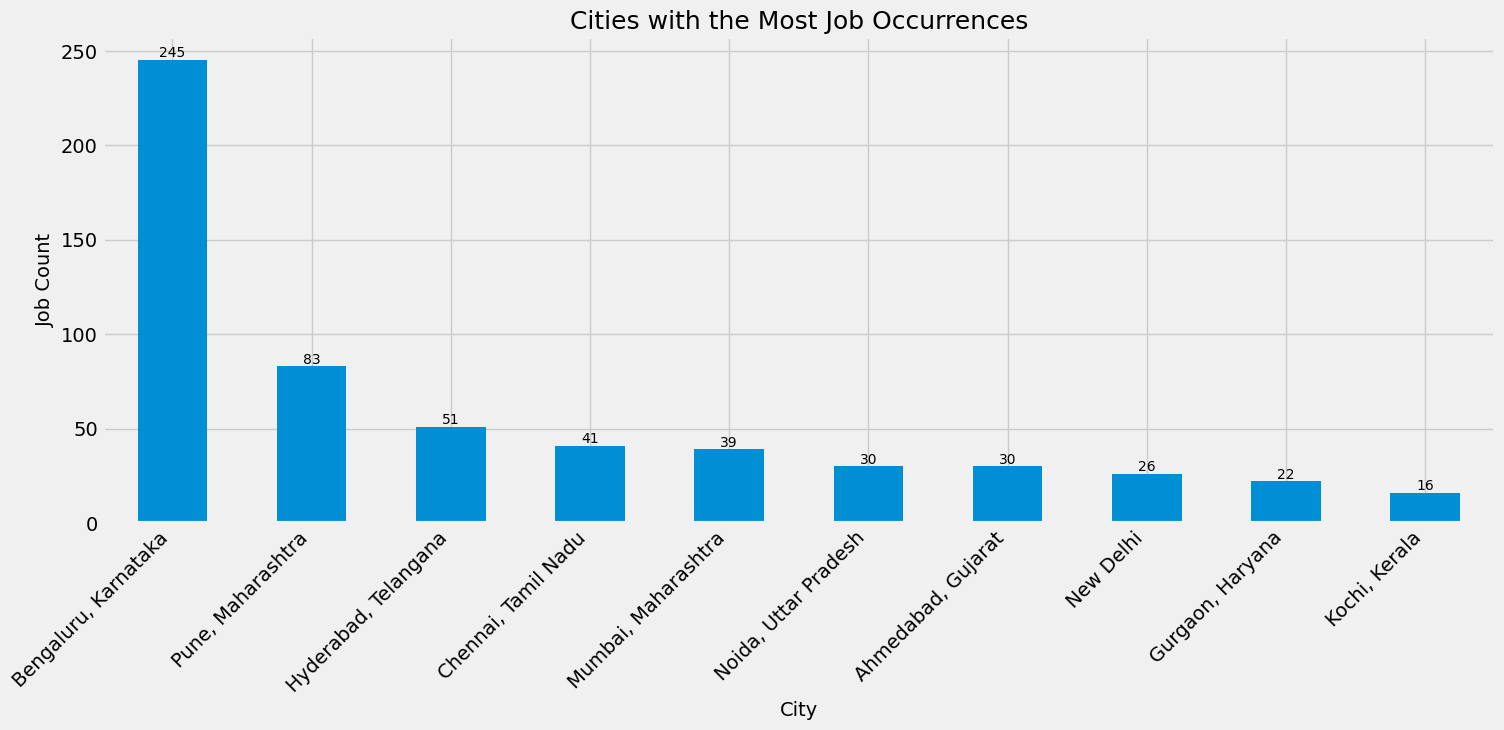

In [39]:
# Creating a bar graph for the top 10 cities with most job occurrences
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16,6)

top_cities = city_counts.head(10)
top_cities.plot(kind='bar')
plt.title('Cities with the Most Job Occurrences', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Job Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Annotate the bar graph with salary values rounded to 2 decimal places
for i, v in enumerate(top_cities):
    plt.text(i, v, f'{v}', ha='center', va='bottom', fontsize=10)

plt.show()


In [40]:
# Checkking top 10 cities with highest salary for Python Developers
grouped_data = df.groupby('Location')
# Calculating the maximum salary for each city
max_salaries = grouped_data['Processed Salary'].apply(lambda x: np.max(x))
max_salaries.sort_values(ascending=False).head(10)

Location
Kolkata, West Bengal      550000.0
Bengaluru, Karnataka      508065.0
New Delhi                 266500.0
Hyderabad, Telangana      225000.0
Pune, Maharashtra         200000.0
Chennai, Tamil Nadu       175000.0
Udaipur, Rajasthan        150000.0
Noida, Uttar Pradesh      137500.0
Coimbatore, Tamil Nadu    137500.0
Mumbai, Maharashtra       129167.0
Name: Processed Salary, dtype: float64

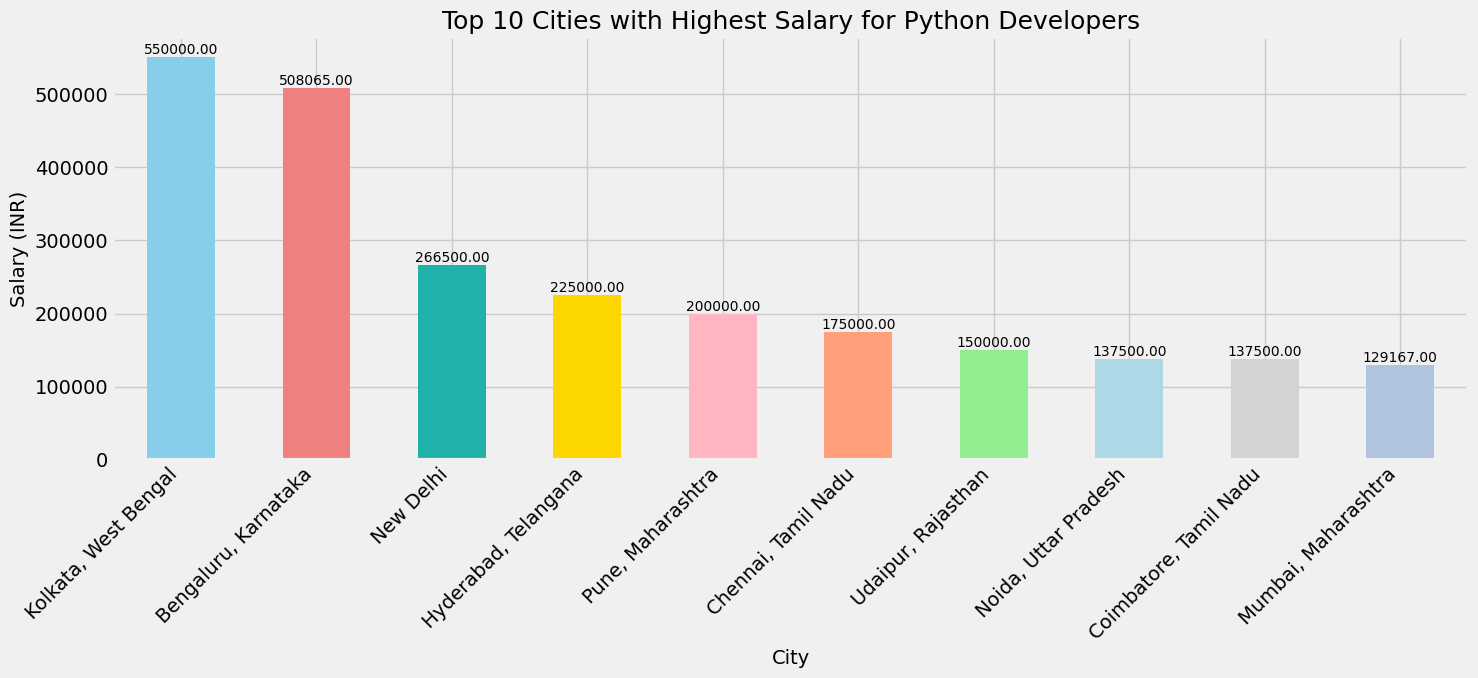

In [41]:
# Creating a bar graph for the top 10 cities with highest salary
top_10_cities = max_salaries.sort_values(ascending=False).head(10)

# Defining colors for each bar
colors = ['skyblue', 'lightcoral', 'lightseagreen', 'gold', 'lightpink', 'lightsalmon', 'lightgreen', 'lightblue', 'lightgray', 'lightsteelblue']

plt.figure(figsize=(15, 7))
top_10_cities.plot(kind='bar', color=colors)
plt.title('Top 10 Cities with Highest Salary for Python Developers', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Salary (INR)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bar graph with salary values
for i, v in enumerate(top_10_cities):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [42]:
# Checking highest to lowest average Salary by City
grouped_data = df.groupby('Location')
# Calculating the average salary
average_salaries = grouped_data['Processed Salary'].apply(lambda x: np.mean(x)).round(2)
# Sorting the data
average_salaries = average_salaries.sort_values(ascending=False)
average_salaries

Location
Udaipur, Rajasthan                  150000.00
Kolkata, West Bengal                131095.29
New Delhi                           114995.00
Bengaluru, Karnataka                105308.45
Pune, Maharashtra                    87352.11
Coimbatore, Tamil Nadu               82500.00
Hyderabad, Telangana                 78593.24
Gurgaon, Haryana                     65540.62
Mohali, Punjab                       62000.00
Chennai, Tamil Nadu                  60537.12
Ahmedabad, Gujarat                   60467.33
Noida, Uttar Pradesh                 59950.36
Bhopal, Madhya Pradesh               56528.00
Mumbai, Maharashtra                  50362.64
Rajkot, Gujarat                      50000.00
Visakhapatnam, Andhra Pradesh        44625.00
Indore, Madhya Pradesh               42222.00
Shimla, Himachal Pradesh             40000.00
Madurai, Tamil Nadu                  39588.00
Kochi, Kerala                        38200.00
Jaipur, Rajasthan                    38055.67
Vadodara, Gujarat        

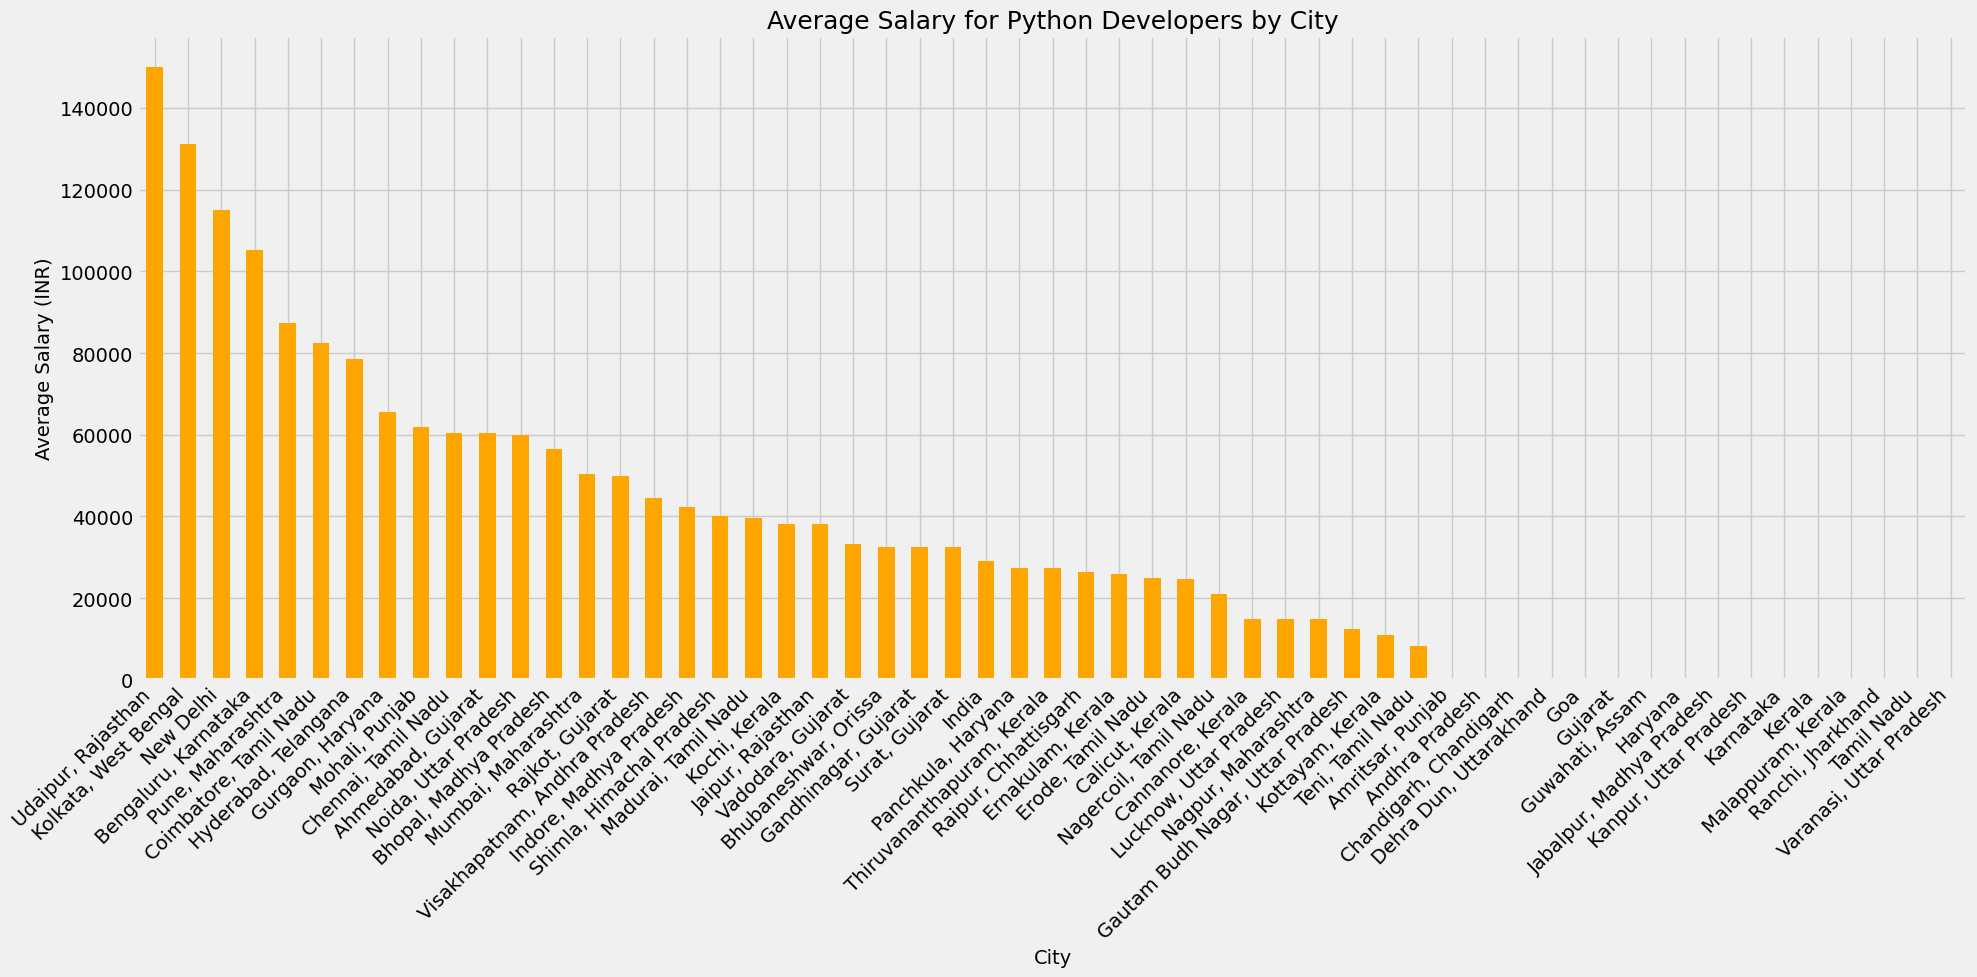

In [43]:
# Creating a bar graph for average salary by City
plt.figure(figsize=(20, 10))

average_salaries.plot(kind='bar', color='orange')
plt.title('Average Salary for Python Developers by City', fontsize = 18)
plt.xlabel('City', fontsize= 14)
plt.ylabel('Average Salary (INR)', fontsize= 14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

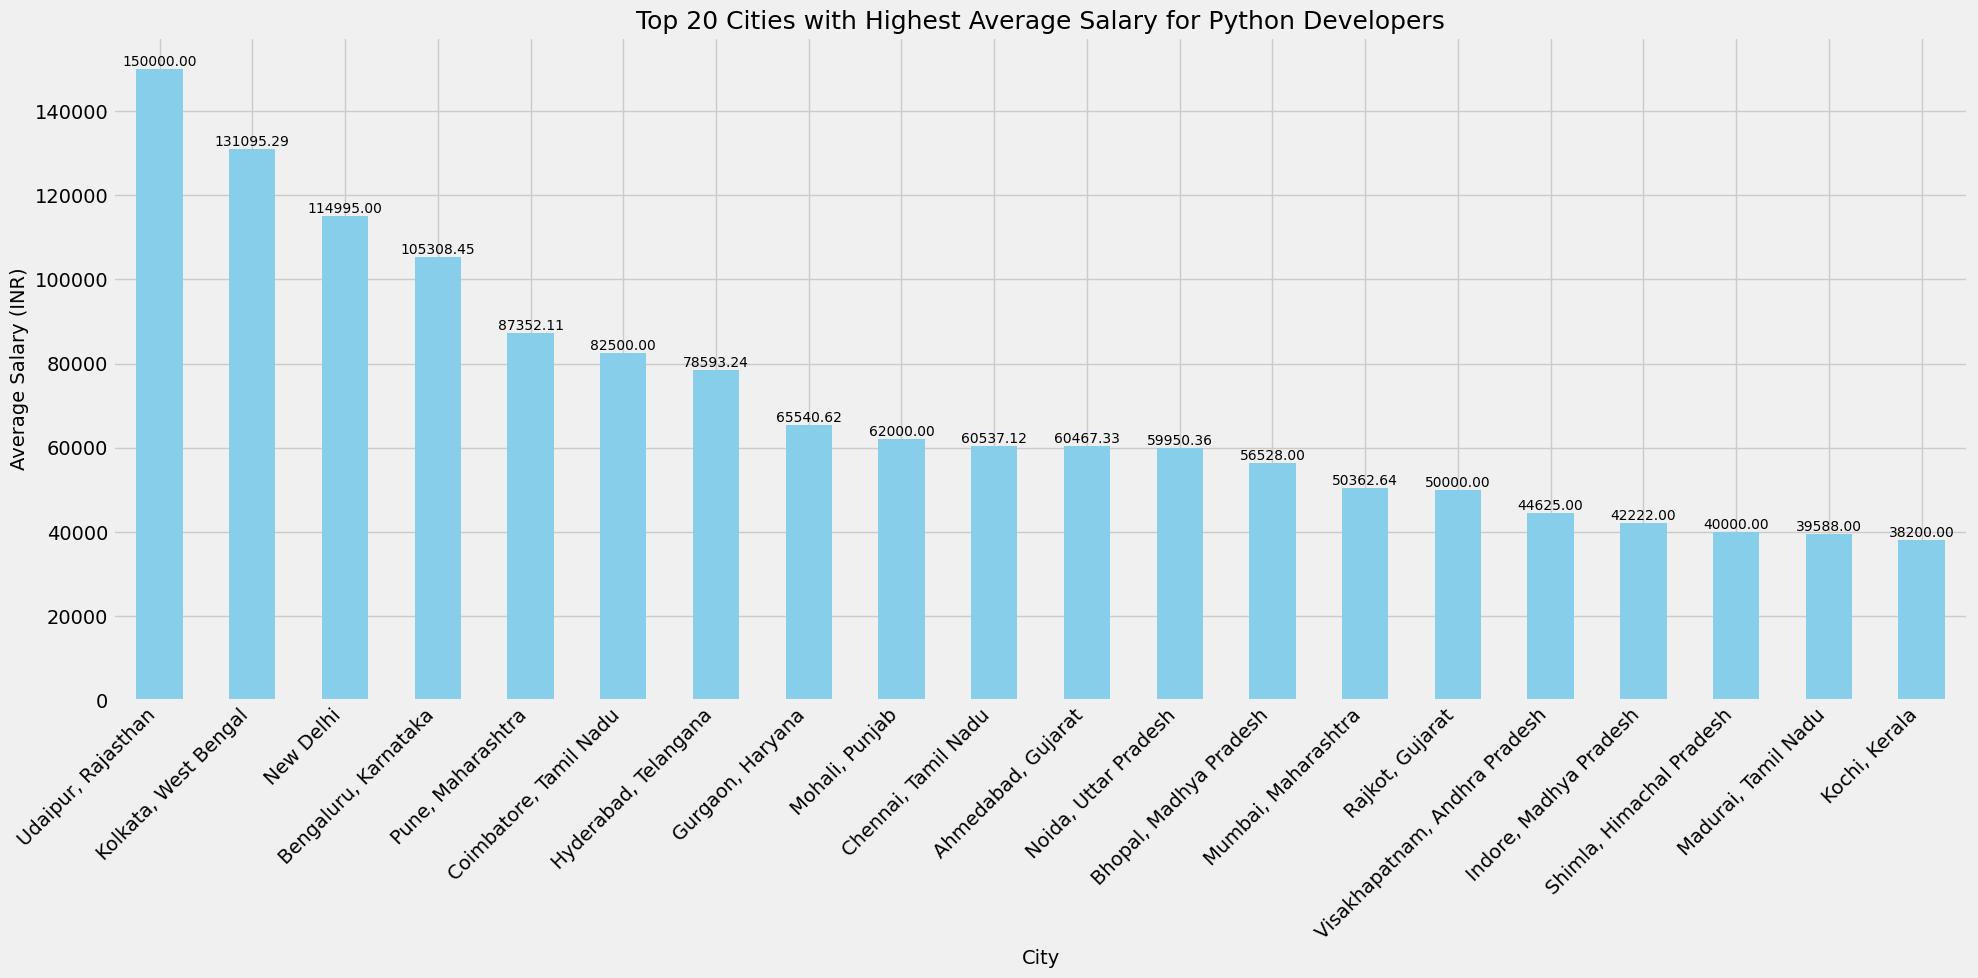

In [44]:
# Creating graph for top 20 Cities with Highest Average Salary

plt.figure(figsize=(20, 10))
top_20_cities = average_salaries.head(20)

top_20_cities.plot(kind='bar', color='skyblue')
plt.title('Top 20 Cities with Highest Average Salary for Python Developers', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Salary (INR)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate the bar graph with average salary values
for i, v in enumerate(top_20_cities):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()